## Imports

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")
%matplotlib inline

# White - Whink - Pink - Pired - Red noise classification with Neural Network

## Loading data

In [2]:
wpr = pd.read_table('./noise/clf_noise5.txt', header=None, sep=' ', names=['Hurst', 'Length', 'Colour_idx', 'Colour'])
wpr = wpr.sample(frac=1)
wpr.head()

,Hurst,Length,Colour_idx,Colour
31090,0.730872,3790,1,whink
17743,0.818537,9060,2,pink
38160,1.235185,5120,3,pired
35776,0.818906,1100,1,whink
43060,1.268132,4570,3,pired


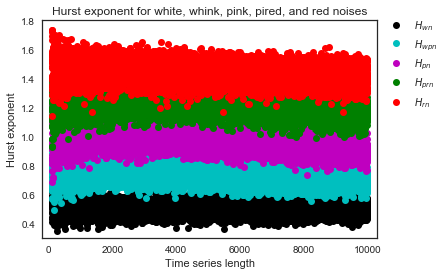

In [3]:
L_plot = wpr['Length']
H_plot = wpr['Hurst']
plt.plot(L_plot[wpr['Colour_idx'] == 0], H_plot[wpr['Colour_idx'] == 0], 'ok', label='$H_{wn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 1], H_plot[wpr['Colour_idx'] == 1], 'oc', label='$H_{wpn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 2], H_plot[wpr['Colour_idx'] == 2], 'om', label='$H_{pn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 3], H_plot[wpr['Colour_idx'] == 3], 'og', label='$H_{prn}$')
plt.plot(L_plot[wpr['Colour_idx'] == 4], H_plot[wpr['Colour_idx'] == 4], 'or', label='$H_{rn}$')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

## ML imports

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

/Applications/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Train and test sets

In [5]:
X = wpr[['Length', 'Hurst']]
y = wpr['Colour_idx']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (34685, 2)
y_train shape: (34685,)
X_test shape: (14865, 2)
y_test shape: (14865,)


## Train and test sets plots

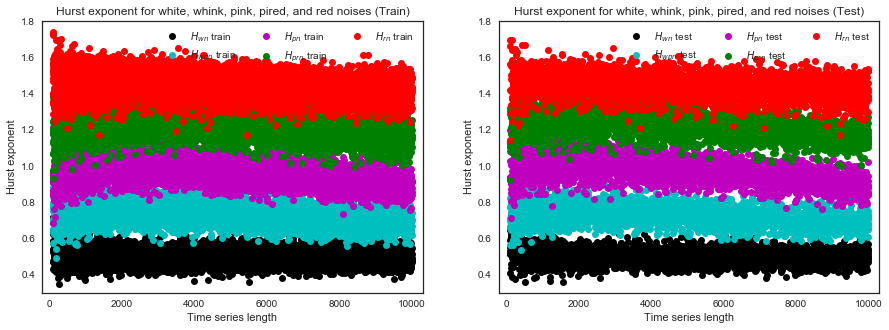

In [6]:
L_train = X_train['Length']
H_train = X_train['Hurst']
L_test = X_test['Length']
H_test = X_test['Hurst']
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(L_train[y_train == 0], H_train[y_train == 0], 'ok', label='$H_{wn}$ train')
plt.plot(L_train[y_train == 1], H_train[y_train == 1], 'oc', label='$H_{wpn}$ train')
plt.plot(L_train[y_train == 2], H_train[y_train == 2], 'om', label='$H_{pn}$ train')
plt.plot(L_train[y_train == 3], H_train[y_train == 3], 'og', label='$H_{prn}$ train')
plt.plot(L_train[y_train == 4], H_train[y_train == 4], 'or', label='$H_{rn}$ train')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Train)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(ncol=3, loc=1)
plt.subplot(122)
plt.plot(L_test[y_test == 0], H_test[y_test == 0], 'ok', label='$H_{wn}$ test')
plt.plot(L_test[y_test == 1], H_test[y_test == 1], 'oc', label='$H_{wpn}$ test')
plt.plot(L_test[y_test == 2], H_test[y_test == 2], 'om', label='$H_{pn}$ test')
plt.plot(L_test[y_test == 3], H_test[y_test == 3], 'og', label='$H_{prn}$ test')
plt.plot(L_test[y_test == 4], H_test[y_test == 4], 'or', label='$H_{rn}$ test')
plt.xlim(-200, 10300)
plt.ylim(0.3, 1.8)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Test)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')
plt.legend(ncol=3, loc=1)

# Neural Network

## Feature scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_mean = scaler.mean_
X_std = np.sqrt(scaler.var_)

## Setting graph

In [8]:
# parameters
n_inputs = 2
n_hidden1 = 10
n_outputs = 5

In [9]:
# placeholders
train_data = tf.placeholder(tf.float32, shape=(None, n_inputs), name='train_data')
train_classes = tf.placeholder(tf.int64, shape=(None), name='train_classes')

In [10]:
# nn model
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(train_data, n_hidden1, name='hidden1', activation=tf.nn.relu)
    logits = tf.layers.dense(hidden1, n_outputs, name='outputs')

In [11]:
# cost function for training
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=train_classes, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [12]:
# minimization of the cost function
learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [13]:
# specification of how to evaluate the model
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, train_classes, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [14]:
# initialize and save the model
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [54]:
# close other possible sessions
try:
    sess.close()
except:
    print('No other active sessions')

In [55]:
# execution
n_epochs = 100
batch_size = 50
sess = tf.InteractiveSession()
init.run()
for epoch in range(n_epochs):
    for iteration in range(len(y_train) // batch_size):
        X_batch = X_train_scaled[iteration*batch_size:(iteration+1)*batch_size,:]
        y_batch = y_train[iteration*batch_size:(iteration+1)*batch_size]
        sess.run(training_op, feed_dict={train_data: X_batch, train_classes: y_batch})
    acc_train = accuracy.eval(feed_dict={train_data: X_batch, train_classes: y_batch})
    acc_val = accuracy.eval(feed_dict={train_data: X_test_scaled, train_classes: y_test})
    print(epoch, 'Train accuracy:', acc_train, 'Validation accuracy:', acc_val)
save_path = saver.save(sess, './saved_model/my_model_final.ckpt')
sess.close()

/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


0 Train accuracy: 0.66 Validation accuracy: 0.5491423
1 Train accuracy: 0.86 Validation accuracy: 0.83619237
2 Train accuracy: 0.94 Validation accuracy: 0.92203164
3 Train accuracy: 0.96 Validation accuracy: 0.9473932
4 Train accuracy: 0.96 Validation accuracy: 0.9568113
5 Train accuracy: 0.96 Validation accuracy: 0.96051127
6 Train accuracy: 0.96 Validation accuracy: 0.9632022
7 Train accuracy: 0.96 Validation accuracy: 0.96582574
8 Train accuracy: 0.96 Validation accuracy: 0.9667003
9 Train accuracy: 0.94 Validation accuracy: 0.9669694
10 Train accuracy: 0.96 Validation accuracy: 0.9674403
11 Train accuracy: 0.96 Validation accuracy: 0.96757483
12 Train accuracy: 0.96 Validation accuracy: 0.9679785
13 Train accuracy: 0.96 Validation accuracy: 0.9679785
14 Train accuracy: 0.96 Validation accuracy: 0.9681803
15 Train accuracy: 0.96 Validation accuracy: 0.9680458
16 Train accuracy: 0.96 Validation accuracy: 0.96824753
17 Train accuracy: 0.96 Validation accuracy: 0.9681803
18 Train accur

In [56]:
# using the model
sess = tf.InteractiveSession()
saver.restore(sess, './saved_model/my_model_final.ckpt')

INFO:tensorflow:Restoring parameters from ./saved_model/my_model_final.ckpt


/Applications/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [59]:
values = scaler.transform([[1023, 1.3]])
Z = logits.eval(feed_dict={train_data: values})
y_pred = np.argmax(Z, axis=1)
class_dict = {0: 'white', 1: 'whink', 2: 'pink', 3: 'pired', 4: 'red'}
print('Predicted class is:', class_dict[y_pred[0]])

Predicted class is: pired


Text(0,0.5,'Hurst exponent')

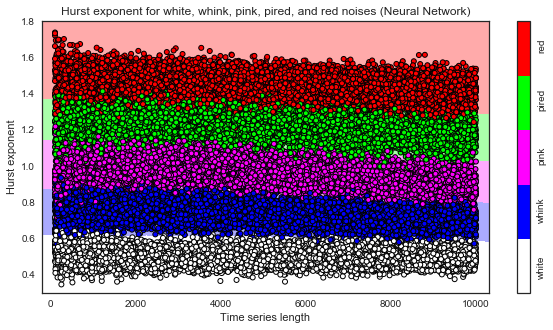

In [61]:
### decision boundary plot
lx = -200
rx = 10300
by = 0.3
ty = 1.8
step = 0.01
lim_new = scaler.transform([[lx, by], [rx, ty]])
xx, yy = np.mgrid[lim_new[0, 0]:lim_new[1, 0]+step:step, lim_new[0, 1]:lim_new[1, 1]+step:step]
pnts = np.c_[xx.ravel(), yy.ravel()]
Z = logits.eval(feed_dict={train_data: pnts})
probs = np.argmax(Z, axis=1).reshape(xx.shape)
xx_new = xx * X_std[0] + X_mean[0]
yy_new = yy * X_std[1] + X_mean[1]
# Create color maps
cmap_light = ListedColormap(['#FFFFFF', '#AAAAFF', '#FFAAFF', '#AAFFAA', '#FFAAAA'])
cmap_bold = ListedColormap(['#FFFFFF', '#0000FF', '#FF00FF', '#00FF00', '#FF0000'])
plt.figure(figsize=(10, 5))
plt.pcolormesh(xx_new, yy_new, probs, cmap=cmap_light)
plt.scatter(X['Length'], X['Hurst'], c=y, cmap=cmap_bold, edgecolor='k', s=25, linewidth=1)
cbar = plt.colorbar()
cbar.set_ticks([0.5, 1.35, 2.1, 2.95, 3.7])
cbar.ax.set_yticklabels(['white', 'whink', 'pink', 'pired', 'red'], rotation=90)
plt.xlim(lx, rx)
plt.ylim(by, ty)
plt.title('Hurst exponent for white, whink, pink, pired, and red noises (Neural Network)')
plt.xlabel('Time series length')
plt.ylabel('Hurst exponent')

In [62]:
sess.close()